# Assignment 1.1 - k-Nearest Neighbor (kNN)

Dear students, you have successfully cloned the repo. Great! :)

# Course Assignment Guidelines

---

## 📚 Weekly Assignment Structure

Each week includes **two assignments**:

| File Format | Required For |
|-------------|--------------|
| `assignment[x]_1.ipynb` | All students |
| `assignment[x]_2.ipynb` | 10 ECTS students only |

Upload your solution as a `.ipynb` file **AND** a `.pdf` file in the respective entry in the whiteboard. You will find each deadline there as well.

---

## ✅ Grading Requirements

### Pass/Fail System
* Each submitted `.ipynb` notebook receives either a **"pass"** or **"fail"** grade
* **Minimum # of passes: n-1** 

### Separate Tracking
The n-1 # of passes is tracked **separately** for each assignment type:

#### For 5 ECTS Students:
- ✔️ Must achieve n-1 # of passes on `assignment[x]_1.ipynb` series

#### For 10 ECTS Students:
- ✔️ Must achieve n-1 # of passes on `assignment[x]_1.ipynb` series
- ✔️ Must achieve n-1 # of passes on `assignment[x]_2.ipynb` series

---

## 🌟 BONUS Tasks

- **Optional BONUS tasks** appear in some notebooks
- Successfully completing **BONUS** tasks earns **extra points** toward your final grade
- Check the **Whiteboard** assignment grading for bonus point confirmations
- 10 ECTS students will find separate bonus tasks in `assignment[x]_2.ipynb`
- 5 ECTS students will **NOT** get additional extra points for solving `assignment[x]_2.ipynb` Bonus tasks
- Vice Versa: 10 ECTS students will **NOT** get additional extra points for solving `assignment[x]_1.ipynb` Bonus tasks

---

## 📋 Quick Summary

| Study Program | Requirements | Pass Criteria |
|---------------|-------------|---------------|
| **5 ECTS** | `assignment[x]_1.ipynb` | n-1 |
| **10 ECTS** | `assignment[x]_1.ipynb` + `assignment[x]_2.ipynb` | n-1 each |
| **All Students** | Optional BONUS tasks | Extra final exam points |


**Note:** The n-1 rule is mandatory to pass the tutorial component of the module.

Please submit your solution of this notebook in the Whiteboard at the corresponding Assignment entry as .ipynb-file and as .pdf. <br><br>
Please do **NOT** rename the file!

#### State both names of your group members here:
[Paola Gega and Daniel Thompson]

In [1]:
# Daniel Thompson and Paola Gega

## Grading Info/Details - Assignment 1.1:

The assignment will be graded semi-automatically, which means that your code will be tested against a set of predefined test cases and qualitatively assessed by a human. This will speed up the grading process for us.

* For passing the test scripts: 
    - Please make sure to **NOT** alter predefined class or function names, as this would lead to failing of the test scripts.
    - Please do **NOT** rename the files before uploading to the Whiteboard!

* **(RESULT)** tags indicate checkpoints that will be specifically assessed by a human.

* You will pass the assignment if you pass the majority of test cases and we can at least confirm effort regarding the **(RESULT)**-tagged checkpoints per task.

Note: For now, we will keep the test cases black-boxed, meaning we won't reveal their internal implementation details. This might be subject to change in the future, depending on how well we can keep up writing test cases for upcoming assignments which are still work in progress. (:

In [2]:
# Your tasks start from here. :)

## Task 1.1.1 - kNN on Iris Dataset

Implement the k-Nearest Neighbor (kNN) algorithm from scratch using only NumPy. <br><br> You may use the provided sklearn functions to load datasets and evaluate your results. Use the [Iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) for training and testing your model. 

* Plot 2 samples per class to check on the data. **(RESULT)**
* Split the dataset into a training set (80%) and a test set (20%). Train your model on the training set and evaluate it on the test set using the accuracy score as a metric. Try at least 3 different values for k (e.g., 1, 3, 5) and report the results. **(RESULT)**

Note: Feature normalization might help to improve your results.

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

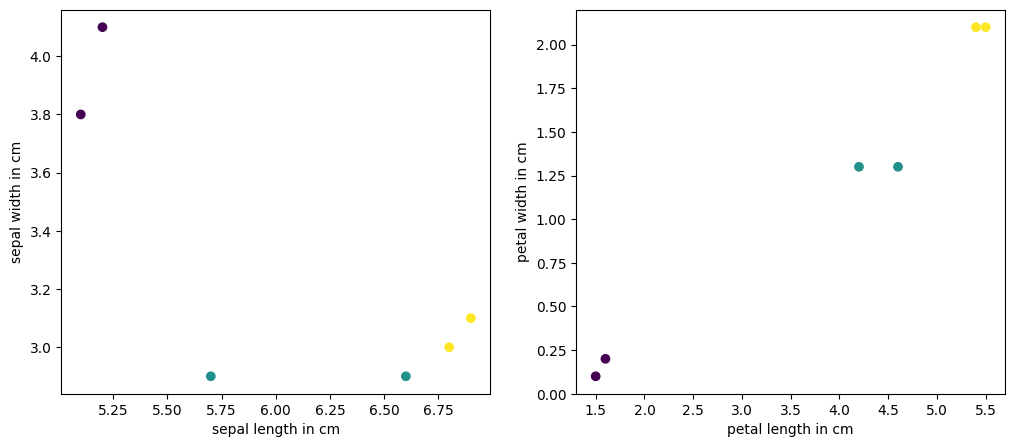

In [4]:
# Load data
iris = load_iris()
# should we also remove outliers?
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# ax.scatter(iris['data'][:, 0], iris['data'][:, 1], iris['data'][:, 2], c=iris['target'])
indices_0 = np.array(np.random.choice(50, 2, replace=False)) # generate 2 random indices for class 0
indices_1 = np.array(np.random.choice(np.arange(50,100), 2, replace=False)) # generate 2 random indices for class 1
indices_2 = np.array(np.random.choice(np.arange(100,150), 2, replace=False)) # generate 2 random indices for class 2

plot_instances = np.vstack((iris['data'][indices_0],iris['data'][indices_1],iris['data'][indices_2])) # stack all values picked from the dataset
plot_labels = np.vstack((iris['target'][indices_0],iris['target'][indices_1],iris['target'][indices_2])) # stack according class labels

plot_1 = plt.subplot(1, 2, 1)
plt.subplots_adjust(bottom=0.1, right=1.6, top=0.9)
plt.scatter(plot_instances[:, 0], plot_instances[:, 1], c=plot_labels)

plot_1.set_xlabel('sepal length in cm')
plot_1.set_ylabel('sepal width in cm')

plot_2 = plt.subplot(1, 2, 2)
plt.scatter(plot_instances[:, 2], plot_instances[:, 3], c=plot_labels)

plot_2.set_xlabel('petal length in cm')
plot_2.set_ylabel('petal width in cm')

plt.show

# Split data into training set and test set then normalize features
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=.2)
means = X_train.mean(axis=0)
stds = X_train.std(axis=0)
stds[stds == 0] = 1 # Avoid division by zero
X_train = (X_train-means)/stds
X_test = (X_test-means)/stds

In [5]:
class KNNClassifier:    # Do not rename
    """K-Nearest Neighbors classifier using only NumPy."""
    
    def __init__(self, k):
        """Initialize KNN classifier, providing k and the training data."""
        self.k = k
    
    def fit(self, X, y):
        """Fit the model using the training data."""
        self.X = X
        self.y = y
    
    def predict(self, X_test):
        """Predict classes for multiple samples."""
        n_test = len(X_test)
        y_test_hat = np.empty(n_test, dtype=int) # initialise predicted label array
        
        # Vectorized computation of Euclidean distances.
        X_test_sqnorms = np.sum(X_test**2, axis=1, keepdims=True)  # (n_test, 1)
        X_train_sqnorms = np.sum(self.X**2, axis=1)  # (n_train, 1) - self.X_train provided as model attribute in this case
        dots = np.dot(X_test, self.X.T)  # (n_test, n_train)
        distances = np.sqrt(X_test_sqnorms + X_train_sqnorms - 2 * dots)  # X_test_sqnorms + X_train_sqnorms - broadcasted addition (n_test, n_train)
        
        for i in np.arange(n_test): # go through test samples
            euc_dist = distances[i]
            # np.sqrt(np.sum((self.X - X_test[i])**2, axis=1)) # compute distance of every training sample to test sample at hand
            sorted_ind = np.argsort(euc_dist) # sort the resulting distances
            nearest_labels = self.y[sorted_ind[:self.k]] # look up the labels of the k closest neighbours and store
            """Return most common label occuring in the array labels"""
            labels, count = np.unique(nearest_labels, return_counts=True)
            y_test_hat[i]= labels[np.argmax(count)] # majority voting in this case is okay because the class distribution is not skewed (50 samples of each class)

        return y_test_hat

In [6]:
for k in [4,15,31]:
    KNN = KNNClassifier(k)
    KNN.fit(X_train, y_train)
    y_test_hat = KNN.predict(X_test)
    # calculate accuracy as proportion of test set correctly labeled
    print("Proportion of test set correctly predicted for k={}:".format(k), np.sum(y_test_hat == y_test) / len(y_test))

Proportion of test set correctly predicted for k=4: 0.9666666666666667
Proportion of test set correctly predicted for k=15: 0.9666666666666667
Proportion of test set correctly predicted for k=31: 0.9333333333333333


## Task 1.1.2 - kNN on MNIST Dataset

* Run your NumPy-based kNN implementation on the [MNIST dataset](https://www.wikiwand.com/en/articles/MNIST_database). **(RESULT)** 
* Report the accuracy of your model on a 20% test split and compare a k = {1,3}. **(RESULT)**
* Visualize 3 misclassified images. **(RESULT)**

Note: You may want touse a subset of the MNIST dataset to reduce computation time.

In [7]:
from sklearn.datasets import fetch_openml

def load_mnist_subset(n_train=5000, n_test=1000):
    """Load a subset of MNIST dataset for faster computation."""
    # Load MNIST from OpenML
    mnist = fetch_openml('mnist_784', version=1, cache=True, parser='auto', as_frame=False)
    random_indices = np.array(np.random.choice(n_train+n_test, n_train+n_test, replace=False)) # generate 6000 (default) random indices to form the subset
    mnist_x_subset = mnist['data'][random_indices] # pick out the corresponding samples x
    mnist_y_subset = np.array([int(y) for y in mnist['target'][random_indices]]) # pick out the corresponding labels y
    
    return train_test_split(mnist_x_subset , mnist_y_subset, test_size=n_test/(n_test+n_train))

Proportion of test set correctly predicted for k=1: 0.937
Proportion of test set correctly predicted for k=3: 0.934


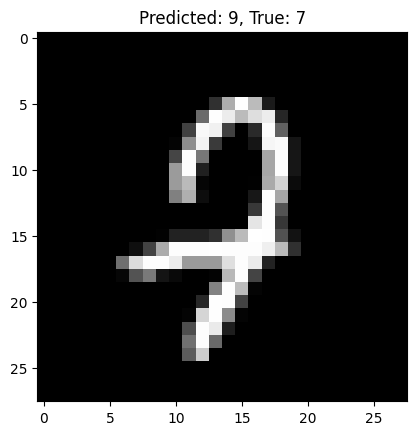

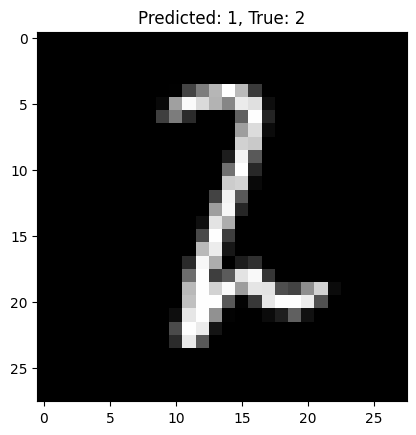

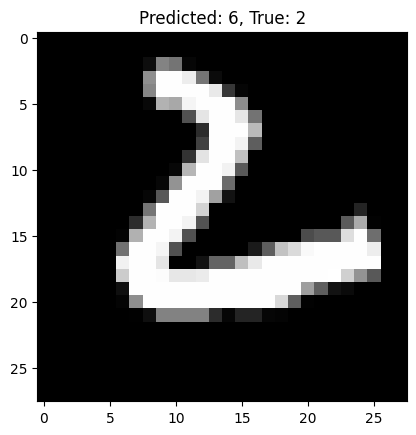

In [8]:
X_train, X_test, y_train, y_test = load_mnist_subset(n_train=4000, n_test=1000)

for k in [1,3]:
    KNN = KNNClassifier(k)
    KNN.fit(X_train, y_train)
    y_test_hat = KNN.predict(X_test)
    # calculate accuracy as proportion of test set correctly labeled
    print("Proportion of test set correctly predicted for k={}:".format(k), np.sum(y_test_hat == y_test) / len(y_test))

count = 0
for i in range(len(y_test)):
    if y_test_hat[i] != y_test[i]:
        plt.imshow(X_test[i].reshape(28,28), cmap='gray')
        plt.title("Predicted: {}, True: {}".format(y_test_hat[i], y_test[i]))
        plt.show()
        count += 1
    if count == 3:
        break

## Congratz, you made it! :)